In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
Health=pd.read_excel('Health.xlsx')
Health.head()

,sen,jens,dard ghafase sineh,feshar khun dar halat esterahat,kolestrol,ghand khun nashta,navar ghalb dar halat esterahat,hadaksar zaraban ghalb,anjin sadri nashi az varzesh,afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat,shibe tamrin dar oje tamrin dar maghtae ST,tedad oroghe bozorg rangi ba flourosopy,talasemi,ehtemal voghu bimari ghalbi
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [2]:
Health=Health.rename(columns={'ehtemal voghu bimari ghalbi':'Outcome'})
Health.head(3)

,sen,jens,dard ghafase sineh,feshar khun dar halat esterahat,kolestrol,ghand khun nashta,navar ghalb dar halat esterahat,hadaksar zaraban ghalb,anjin sadri nashi az varzesh,afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat,shibe tamrin dar oje tamrin dar maghtae ST,tedad oroghe bozorg rangi ba flourosopy,talasemi,Outcome
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1


In [3]:
from sklearn.model_selection import train_test_split
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
y=Health['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [4]:
print('number of training data:%d'% X_train.shape[0])
print('number of test data:%d'% X_test.shape[0])

number of training data:148
number of test data:149


In [5]:
Health.shape

(297, 14)

In [6]:
print(np.unique(Health.Outcome ,return_counts=True))

(array([0, 1], dtype=int64), array([160, 137], dtype=int64))


In [7]:
Health.isnull().sum()

sen                                                                  0
jens                                                                 0
dard ghafase sineh                                                   0
feshar khun dar halat esterahat                                      0
kolestrol                                                            0
ghand khun nashta                                                    0
navar ghalb dar halat esterahat                                      0
hadaksar zaraban ghalb                                               0
anjin sadri nashi az varzesh                                         0
afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat    0
shibe tamrin dar oje tamrin dar maghtae ST                           0
 tedad oroghe bozorg rangi ba flourosopy                             0
talasemi                                                             0
Outcome                                                              0
dtype:

In [8]:
Health.Outcome.value_counts()

0    160
1    137
Name: Outcome, dtype: int64

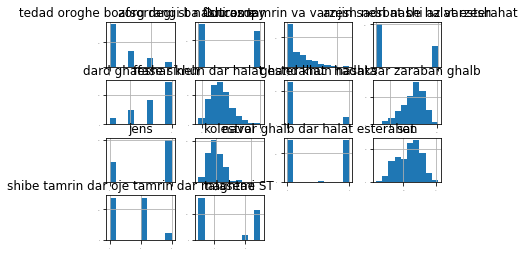

In [9]:
#Histogram
Health.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
plt.show()

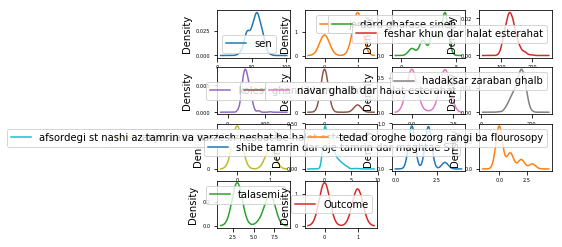

In [10]:
#Density
Health.plot(kind='density',subplots=True,layout=(4,4),sharex=False,sharey=False,fontsize=5)
plt.show()

In [11]:
#load Import Libarary for Machine Learning Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=12)
# Train the model using the training sets and check score
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
    
scores_RFC= cross_val_score(rfc, X, y,cv=kfold)
print('[1]','scores for RFC=',scores_RFC.mean())

[1] scores for RFC= 0.7741379310344827


In [13]:
print('RFC For tset=',rfc.score(X_test,y_test))
print('RFC For train=',rfc.score(X_train,y_train))

RFC For tset= 0.9865771812080537
RFC For train= 0.9932432432432432


In [14]:
Diabetic_prediction_rfc=rfc.predict([[23 , 34 , 12 , 124 , 343 , 23 , 34 , 23,42,124,45,12]]) 
lookup_Diabetic_name_rfc=[Diabetic_prediction_rfc[0]]
print('[1]','RFC=',lookup_Diabetic_name_rfc)

[1] RFC= [1]


In [15]:
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot
def Diag_Diabetes():
    import numpy as np
    predicted=rfc.predict(X_test)
    accurace_rfc=np.mean(predicted==y_test)
    print('[1]','accuracy for RandomForestClassifier =%.2f'%accurace_rfc)
Diag_Diabetes() 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[1] accuracy for RandomForestClassifier =0.99


In [16]:
from sklearn.metrics import classification_report,confusion_matrix
predicted=rfc.predict(X_test)
print('[1]','rfc=')
print(confusion_matrix(y_test,predicted,[0,1]))
print()

[1] rfc=
[[74  0]
 [ 2 73]]



Result for RFC= 0.9996396396396396


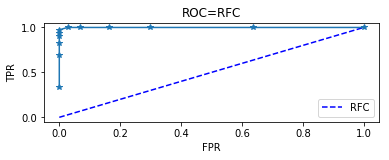

In [17]:
# Nemodare ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
predicted_pred=rfc.predict_proba(X_test)[ :,1]
fpr,tpr,thresholds=roc_curve(y_test,predicted_pred)
plt.subplot(211)
plt.plot([0,1],[0,1],'k--',label='RFC',color='b')
plt.plot(fpr,tpr , marker='*')
plt.xlabel("FPR")
plt.ylabel("TPR")
print('Result for RFC=',roc_auc_score(y_test,predicted_pred))
plt.title('ROC=RFC')
plt.xticks()
plt.yticks()
plt.legend(loc='lower right')
plt.show()

In [18]:
#kNN (k- Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
# Create KNeighbors classifier object model 
KNeighborsClassifier(algorithm ='ball_tree',n_neighbors=6) # default value for n_neighbors is 5
knn=KNeighborsClassifier(n_neighbors=6,p=4,leaf_size=297)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=297, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=4,
           weights='uniform')

In [19]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier(alpha=0.01,hidden_layer_sizes=(50,),validation_fraction=0.9,shuffle=False)
MLP.fit(X,y)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.9,
       verbose=False, warm_start=False)

In [20]:
from sklearn import svm
# there is various option associated with it, this is simple for classification. You can refer link, for mo# re detail.
SVM=svm.SVC(kernel='rbf', probability=True, cache_size=100)

SVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=100, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
from sklearn.naive_bayes import GaussianNB
# Create SVM classification object model = GaussianNB() # there is other distribution for multinomial classes like Bernoulli Naive Bayes, Refer link
GNB=GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB(priors=None)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
DTree=tree.DecisionTreeClassifier(criterion='gini',random_state=60)
DTree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=60,
            splitter='best')

In [23]:
print('RFC For tset=',rfc.score(X_test,y_test))
print('RFC For train=',rfc.score(X_train,y_train))

print('\n','KNN For tset=',knn.score(X_test,y_test))
print('KNN For train=',knn.score(X_train,y_train))

print('\n','MLP For Train=',MLP.score(X_train,y_train))
print('MLP For Test=',MLP.score(X_test,y_test))

print('\n','TREE For Train=',DTree.score(X_train,y_train))
print('TREE For Test=',DTree.score(X_test,y_test))


print('\n','GaussianNB For Train=',GNB.score(X_train,y_train))
print('GaussianNB For Test=',GNB.score(X_test,y_test))
    
print('\n','SVM For Train=',SVM.score(X_train,y_train))
print('SVM For Test=',SVM.score(X_test,y_test))
    

RFC For tset= 0.9865771812080537
RFC For train= 0.9932432432432432

 KNN For tset= 0.5838926174496645
KNN For train= 0.7297297297297297

 MLP For Train= 0.581081081081081
MLP For Test= 0.4966442953020134

 TREE For Train= 1.0
TREE For Test= 1.0

 GaussianNB For Train= 0.8445945945945946
GaussianNB For Test= 0.7986577181208053

 SVM For Train= 1.0
SVM For Test= 0.4966442953020134


C:\Users\Windows 10\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


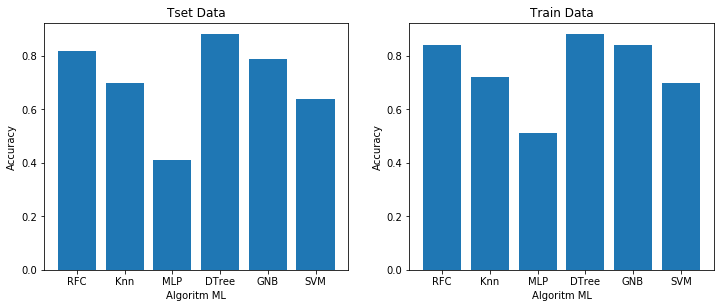

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
python_course_green = "#476042"
plt.figure(figsize=(12, 10))
plt.subplot(221) # equivalent to: plt.subplot(2, 2, 1)

Test=[0.82,0.70,0.41,0.88,0.79,0.64]
labels=['RFC','Knn','MLP','DTree','GNB','SVM']
xs=[i for i,_ in enumerate(labels)]
plt.bar(xs,Test)
plt.xticks(xs,labels)
plt.title('Tset Data')
plt.xlabel('Algoritm ML')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



plt.subplot(222)


Train=[0.84,0.72,0.51,0.88,0.84,0.70]
labels=['RFC','Knn','MLP','DTree','GNB','SVM']
xs=[i for i,_ in enumerate(labels)]
plt.bar(xs,Train)
plt.xticks(xs,labels)
plt.title('Train Data')
plt.xlabel('Algoritm ML')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



plt.plot()
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=15, random_state=True)
    
scores_RFC= cross_val_score(rfc, X, y,cv=kfold)
print('[1]','scores for RFC=',scores_RFC.mean())
    
scores_knn= cross_val_score(knn, X, y,cv=kfold)
print('[2]','scores for Knn=',scores_knn.mean())

scores_MLP= cross_val_score(MLP, X, y,cv=kfold)
print('[3]','scores for MLP=',scores_MLP.mean())
scores_DTree= cross_val_score(DTree, X, y,cv=kfold)
print('[5]','scores for DTree=',scores_DTree.mean())

scores_GNB= cross_val_score(GNB, X, y,cv=kfold)
print('[6]','scores for GNB=',scores_GNB.mean())
scores_SVM= cross_val_score(SVM, X, y,cv=kfold)
print('[8]','scores for SVM=',scores_SVM.mean())

[1] scores for RFC= 0.7642105263157895
[2] scores for Knn= 0.6459649122807019
[3] scores for MLP= 0.4975438596491228
[5] scores for DTree= 0.7203508771929824
[6] scores for GNB= 0.8073684210526315
[8] scores for SVM= 0.5445614035087718


C:\Users\Windows 10\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


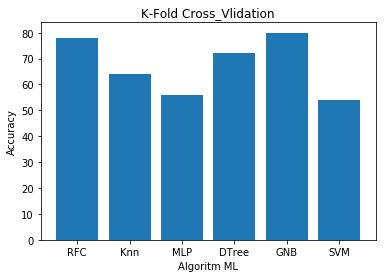

In [26]:
import matplotlib.pyplot as plt
#values=[scores_RFC.mean,scores_knn.mean,scores_MLP.mean,scores_ABC.mean,scores_DTree.mean,
                        #scores_GNB.mean,scores_gbc.mean,scores_SVM.mean,scores_ETC.mean]

Values=[78,64,56,72,80,54]

labels=['RFC','Knn','MLP','DTree','GNB','SVM']
xs=[i for i,_ in enumerate(labels)]
plt.bar(xs,Values)
plt.xticks(xs,labels)
plt.title('K-Fold Cross_Vlidation')
plt.xlabel('Algoritm ML')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [27]:
Diabetic_prediction_rfc=rfc.predict([[23 , 34 , 12 , 124 , 343 , 23 , 34 , 23,42,124,45,12]]) 
lookup_Diabetic_name_rfc=[Diabetic_prediction_rfc[0]]
print('[1]','RFC=',lookup_Diabetic_name_rfc)
    
Diabetic_prediction_MLP=MLP.predict([[23 , 34 , 12 , 124 , 343 , 23 , 34 , 23,42,124,45,12]])
lookup_Diabetic_name_MLP=[Diabetic_prediction_MLP[0]]
print('[2]','MLP=',lookup_Diabetic_name_MLP)
    
Diabetic_prediction_knn=knn.predict([[23 , 34 , 12 , 124 , 343 , 23 , 34 , 23,42,124,45,12]])
lookup_Diabetic_name_knn=[Diabetic_prediction_MLP[0]]
print('[3]','knn=',lookup_Diabetic_name_knn)
    
    

Diabetic_prediction_TREE=DTree.predict([[23 , 34 , 12 , 124 , 343 , 23 , 34 , 23,42,124,45,12]])
lookup_Diabetic_name_TREE=[Diabetic_prediction_TREE[0]]
print('[5]','Tree=',lookup_Diabetic_name_TREE)
    
Diabetic_prediction_GNB=GNB.predict([[23 , 34 , 12 , 124 , 343 , 23 , 34 , 23,42,124,45,12]])
lookup_Diabetic_name_GNB=[Diabetic_prediction_GNB[0]]
print('[6]','GaussianNB=',lookup_Diabetic_name_GNB)
    

    
    
Diabetic_prediction_SVM=SVM.predict([[23 , 34 , 12 , 124 , 343 , 23 , 34 , 23,42,124,45,12]])
lookup_Diabetic_name_SVM=[Diabetic_prediction_SVM[0]]
print('[8]','SVM=',lookup_Diabetic_name_SVM)
    
    
print('\n','info=')
    #valuelist=[lookup_Diabetic_name_rfc,lookup_Diabetic_name_MLP,lookup_Diabetic_name_knn,lookup_Diabetic_name_ABC,lookup_Diabetic_name_TREE,
               #lookup_Diabetic_name_GNB,lookup_Diabetic_name_GBC,lookup_Diabetic_name_SVM,lookup_Diabetic_name_ETC]
    #print(valuelist)
print('0==عدم مبتلا به بیماری قلبی And 1== مبتلا به بیماری قلبی')
    
estimators=[]
estimators.append(('RandomForestClassifier', lookup_Diabetic_name_rfc))
estimators.append(('KNeighborsClassifier', lookup_Diabetic_name_MLP))
estimators.append(('MLPClassifier', lookup_Diabetic_name_knn))
estimators.append(('tree', lookup_Diabetic_name_TREE))
estimators.append(('GaussianNB', lookup_Diabetic_name_GNB))
estimators.append(('svm', lookup_Diabetic_name_SVM))

print(estimators)

[1] RFC= [1]
[2] MLP= [1]
[3] knn= [1]
[5] Tree= [1]
[6] GaussianNB= [1]
[8] SVM= [0]

 info=
0==عدم مبتلا به بیماری قلبی And 1== مبتلا به بیماری قلبی
[('RandomForestClassifier', [1]), ('KNeighborsClassifier', [1]), ('MLPClassifier', [1]), ('tree', [1]), ('GaussianNB', [1]), ('svm', [0])]


In [28]:
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot

import numpy as np
predicted=rfc.predict(X_test)
accurace_rfc=np.mean(predicted==y_test)
print('[1]','accuracy for RandomForestClassifier =%.2f'%accurace_rfc)
    
predicted=knn.predict(X_test)
accurace_knn=np.mean(predicted==y_test)
print('[2]','accuracy for KNeighborsClassifier =%.2f'%accurace_knn)
    
    
predicted=MLP.predict(X_test)
accurace_MLP=np.mean(predicted==y_test)
print('[3]','accuracy for MLPClassifier =%.2f'%accurace_MLP)
    

    
    
predicted=DTree.predict(X_test)
accurace_Dtree=np.mean(predicted==y_test)
print('[5]','accuracy for tree =%.2f'%accurace_Dtree)
    
    
predicted=GNB.predict(X_test)
accurace_GNB=np.mean(predicted==y_test)
print('[6]','accuracy for GaussianNB =%.2f'%accurace_GNB)
    
    

    
predicted=SVM.predict(X_test)
accurace_SVM=np.mean(predicted==y_test)
print('[8]','accuracy for Support Vector Machine =%.2f'%accurace_SVM)
    
    
    #لطفا یک لیست تعریف کنید و دقت هرالگوریتم را داخل لیست بگذارید تا براساس وزن گیری مشخص کنید کدوم الگوریتم نتجیه بهتری دارد...
print('\n')
valuelist2=['RFC=',accurace_rfc,'KNN=',accurace_knn,'MLP=',accurace_MLP,'Dtree=',accurace_Dtree,
'GNB=',accurace_GNB,'SVM=',accurace_SVM]
print('info=',valuelist2)
   

[1] accuracy for RandomForestClassifier =0.99
[2] accuracy for KNeighborsClassifier =0.58
[3] accuracy for MLPClassifier =0.50
[5] accuracy for tree =1.00
[6] accuracy for GaussianNB =0.80
[8] accuracy for Support Vector Machine =0.50


info= ['RFC=', 0.9865771812080537, 'KNN=', 0.5838926174496645, 'MLP=', 0.4966442953020134, 'Dtree=', 1.0, 'GNB=', 0.7986577181208053, 'SVM=', 0.4966442953020134]


C:\Users\Windows 10\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


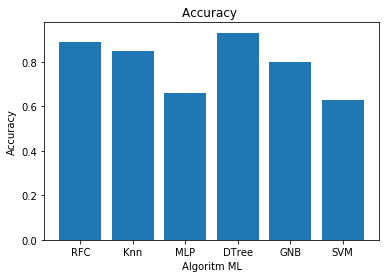

In [39]:
import matplotlib.pyplot as plt
#values=[scores_RFC.mean,scores_knn.mean,scores_MLP.mean,scores_ABC.mean,scores_DTree.mean,
                        #scores_GNB.mean,scores_gbc.mean,scores_SVM.mean,scores_ETC.mean]

Values1=[0.89,0.85,0.66,0.93,0.80,0.63]

labels1=['RFC','Knn','MLP','DTree','GNB','SVM']
xs=[i for i,_ in enumerate(labels1)]
plt.bar(xs,Values1)
plt.xticks(xs,labels1)
plt.title('Accuracy ')
plt.xlabel('Algoritm ML')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [30]:
#رای گیری اکثریت به منظور یافتن بهترین نتیجه
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

    
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=True)

    
    
estimators = []
clf1 = RandomForestClassifier(random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=738)
clf3 = MLPClassifier(alpha=0.01,hidden_layer_sizes=(100,),validation_fraction=0.9,shuffle=False)
clf4 = tree.DecisionTreeClassifier(criterion='gini',random_state=60)
clf5 = GaussianNB()
clf6 = svm.SVC()


eclf = VotingClassifier(estimators=[('RF', clf1), ('KNN', clf2), ('MLP', clf3), ('tree', clf4)
                                   , ('GNB', clf5), ('SVM', clf6)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6
        ,eclf], ['RandomForestClassifier', 'KNeighborsClassifier', 'MLPClassifier','tree',
        'GaussianNB', 'svm', 'Ensemble']):
    
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

    
print('\n','Voting Ensemble')
estimators.append(('RandomForestClassifier', clf1))
estimators.append(('KNeighborsClassifier', clf2))
estimators.append(('MLPClassifier', clf3))

estimators.append(('tree', clf4))
estimators.append(('GaussianNB', clf5))

estimators.append(('svm', clf6))


# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())
    

#Voting_Classfier()

Accuracy: 0.78 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.62 (+/- 0.04) [KNeighborsClassifier]
Accuracy: 0.63 (+/- 0.08) [MLPClassifier]
Accuracy: 0.72 (+/- 0.05) [tree]
Accuracy: 0.81 (+/- 0.07) [GaussianNB]
Accuracy: 0.54 (+/- 0.00) [svm]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

Accuracy: 0.72 (+/- 0.06) [Ensemble]

 Voting Ensemble


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

0.7536781609195402


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


C:\Users\Windows 10\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


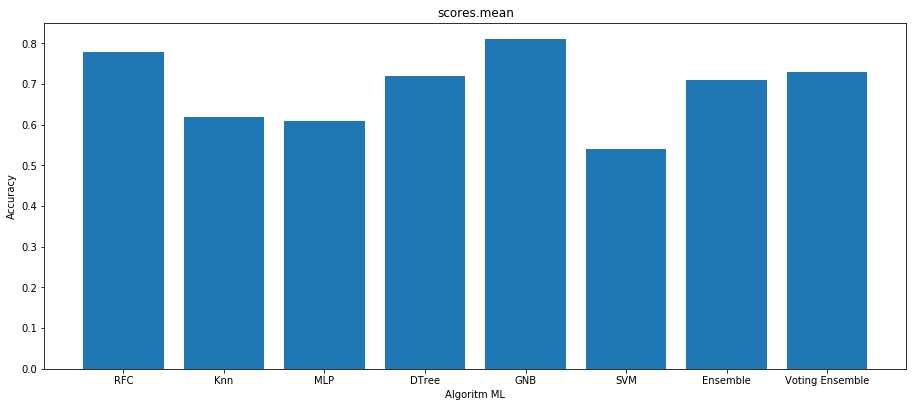

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
python_course_green = "#476042"
plt.figure(figsize=(34, 14))
plt.subplot(221) # equivalent to: plt.subplot(2, 2, 1)

Test=[0.78,0.62,0.61,0.72,0.81,0.54,0.71,0.73]
labels=['RFC','Knn','MLP','DTree','GNB','SVM','Ensemble','Voting Ensemble']
xs=[i for i,_ in enumerate(labels)]
plt.bar(xs,Test)
plt.xticks(xs,labels)
plt.title('scores.mean')
plt.xlabel('Algoritm ML')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.plot()
plt.show()


In [32]:
#ماتریس در هم ریختگی
#Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
predicted=rfc.predict(X_test)
print('[1]','rfc=')
print(confusion_matrix(y_test,predicted,[0,1]))
print()

predicted=knn.predict(X_test)
print('[2]','knn=')
print(confusion_matrix(y_test,predicted,[0,1]))
print()


predicted=MLP.predict(X_test)
print('[3]','MLP=')
print(confusion_matrix(y_test,predicted,[0,1]))
print()



predicted=DTree.predict(X_test)
print('[5]','DTree=')
print(confusion_matrix(y_test,predicted,[0,1]))
print()


predicted=GNB.predict(X_test)
print('[6]','GNB=')
print(confusion_matrix(y_test,predicted,[0,1]))
print()





predicted=SVM.predict(X_test)
print('[8]','SVM=')
print(confusion_matrix(y_test,predicted,[0,1]))
print()







#print(classification_report,y_test,predicted)

[1] rfc=
[[74  0]
 [ 2 73]]

[2] knn=
[[60 14]
 [48 27]]

[3] MLP=
[[74  0]
 [75  0]]

[5] DTree=
[[74  0]
 [ 0 75]]

[6] GNB=
[[64 10]
 [20 55]]

[8] SVM=
[[74  0]
 [75  0]]



Result for RFC= 0.9996396396396396


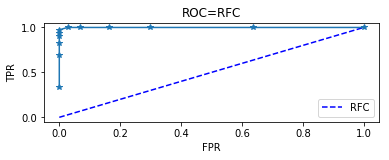

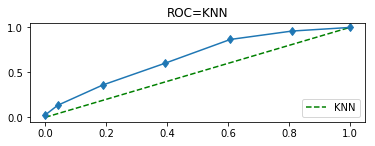

Result for KNN= 0.6663063063063063



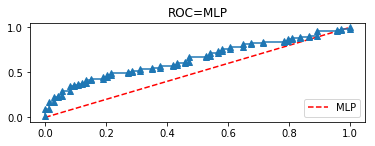

Result for MLP= 0.6522522522522523



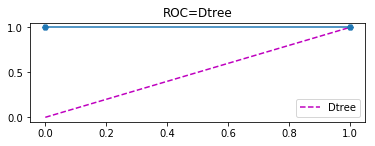

Result for Dtree= 1.0



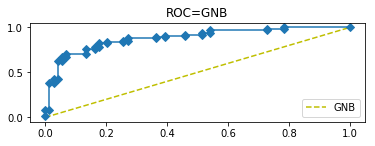

Resultfor GNB= 0.8850450450450451



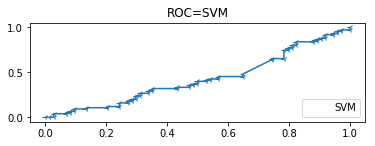

Result for SVM= 0.4252252252252252


In [33]:
#نموار ROC
# Nemodare ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
predicted_pred=rfc.predict_proba(X_test)[ :,1]
fpr,tpr,thresholds=roc_curve(y_test,predicted_pred)
plt.subplot(211)
plt.plot([0,1],[0,1],'k--',label='RFC',color='b')
plt.plot(fpr,tpr , marker='*')
plt.xlabel("FPR")
plt.ylabel("TPR")
print('Result for RFC=',roc_auc_score(y_test,predicted_pred))
plt.title('ROC=RFC')
plt.xticks()
plt.yticks()
plt.legend(loc='lower right')
plt.show()


print()
predicted_pred=knn.predict_proba(X_test)[ :,1]
fpr,tpr,thresholds=roc_curve(y_test,predicted_pred)
plt.subplot(211)
plt.plot([0,1],[0,1],'k--',label='KNN',color='g')
plt.plot(fpr,tpr, marker='d')
plt.title('ROC=KNN')
plt.xticks()
plt.yticks()
plt.legend(loc='lower right')
plt.show()




print('Result for KNN=',roc_auc_score(y_test,predicted_pred))


print()
predicted_pred=MLP.predict_proba(X_test)[ :,1]
fpr,tpr,thresholds=roc_curve(y_test,predicted_pred)
plt.subplot(211)
plt.plot([0,1],[0,1],'k--',label='MLP',color='r')
plt.plot(fpr,tpr, marker='^')
plt.title('ROC=MLP')
plt.xticks()
plt.yticks()
plt.legend(loc='lower right')
plt.show()


print('Result for MLP=',roc_auc_score(y_test,predicted_pred))






print()
predicted_pred=DTree.predict_proba(X_test)[ :,1]
fpr,tpr,thresholds=roc_curve(y_test,predicted_pred)
plt.subplot(211)
plt.plot([0,1],[0,1],'k--',label='Dtree',color='m')
plt.plot(fpr,tpr, marker='H')
plt.title('ROC=Dtree')
plt.xticks()
plt.yticks()
plt.legend(loc='lower right')
plt.show()


print('Result for Dtree=',roc_auc_score(y_test,predicted_pred))




print()
predicted_pred=GNB.predict_proba(X_test)[ :,1]
fpr,tpr,thresholds=roc_curve(y_test,predicted_pred)
plt.subplot(211)
plt.plot([0,1],[0,1],'k--',label='GNB',color='y')
plt.plot(fpr,tpr, marker='D')
plt.title('ROC=GNB')
plt.xticks()
plt.yticks()
plt.legend(loc='lower right')
plt.show()



print('Resultfor GNB=',roc_auc_score(y_test,predicted_pred))







print()
predicted_pred=SVM.predict_proba(X_test)[ :,1]
fpr,tpr,thresholds=roc_curve(y_test,predicted_pred)
plt.subplot(211)
plt.plot([0,1],[0,1],'k--',label='SVM',color='w')
plt.plot(fpr,tpr, marker='3')
plt.title('ROC=SVM')
plt.xticks()
plt.yticks()
plt.legend(loc='lower right')
plt.show()


print('Result for SVM=',roc_auc_score(y_test,predicted_pred))






In [34]:
#GridSearch Cross Validation
#Random Search Parameter tuning

print('--------------------------------------------------')
print('                ','GridSearch Cross Validation')
from sklearn.model_selection import GridSearchCV

param_grid={}
#param_grid={'n_neigbors':np.arange(1,50)}
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)
print('KNN=',knn_cv.best_score_)
#print(knn_cv.best_estimator_)
#print(knn_cv.best_params_)


print()
#Random Search Parameter tuning
print('              ','Random Search Parameter tuning')
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
param_grid={}
#param_grid={'n_neigbors':np.arange(1,50)}
knn_RS=RandomizedSearchCV(knn,param_distributions=param_grid,n_iter=1,random_state=7)
knn_RS.fit(X,y)
print('KNN=',knn_RS.best_score_)
#print(knn_RS.best_estimator_)
print('--------------------------------------------------')
rfc_cv=GridSearchCV(rfc,param_grid,cv=5)
rfc_cv.fit(X,y)
print('                ','GridSearch Cross Validation')
print('RFC=',rfc_cv.best_score_)
#print(rfc_cv.best_estimator_)
print()
print('               ','Random Search Parameter tuning')
rfc_cv=RandomizedSearchCV(rfc,param_distributions=param_grid,n_iter=1,random_state=7)
rfc_cv.fit(X,y)
print('RFC=',rfc_cv.best_score_)
#print(rfc_cv.best_estimator_)
print('--------------------------------------------------')
MLP_cv=GridSearchCV(MLP,param_grid,cv=5)
MLP_cv.fit(X,y)
print('                ','GridSearch Cross Validation')
print('MLP=',MLP_cv.best_score_)
#print(MLP_cv.best_estimator_)
print()
print('               ','Random Search Parameter tuning')
MLP_cv=RandomizedSearchCV(MLP,param_distributions=param_grid,n_iter=1,random_state=7)
MLP_cv.fit(X,y)
print('MLP=',MLP_cv.best_score_)
#print(MLP_cv.best_estimator_)
print('--------------------------------------------------')

DTree_cv=GridSearchCV(DTree,param_grid,cv=5)
DTree_cv.fit(X,y)
print('                ','GridSearch Cross Validation')
print('DTree=',DTree_cv.best_score_)
#print(DTree_cv.best_estimator_)
print()
print('               ','Random Search Parameter tuning')
DTree_cv=RandomizedSearchCV(DTree,param_distributions=param_grid,n_iter=1,random_state=7)
DTree_cv.fit(X,y)
print('DTree=',DTree_cv.best_score_)
#print(DTree_cv.best_estimator_)
print('--------------------------------------------------')
GNB_cv=GridSearchCV(GNB,param_grid,cv=5)
GNB_cv.fit(X,y)
print('                ','GridSearch Cross Validation')
print('GNB=',GNB_cv.best_score_)
#print(GNB_cv.best_estimator_)
print()
print('               ','Random Search Parameter tuning')
GNB_cv=RandomizedSearchCV(GNB,param_distributions=param_grid,n_iter=1,random_state=7)
GNB_cv.fit(X,y)
print('GNB=',GNB_cv.best_score_)
#print(GNB_cv.best_estimator_)
print('--------------------------------------------------')

SVM_cv=GridSearchCV(SVM,param_grid,cv=5)
SVM_cv.fit(X,y)
print('                ','GridSearch Cross Validation')
print('SVM=',SVM_cv.best_score_)
#print(SVM_cv.best_estimator_)
print()
print('               ','Random Search Parameter tuning')
SVM_cv=RandomizedSearchCV(SVM,param_distributions=param_grid,n_iter=1,random_state=7)
SVM_cv.fit(X,y)
print('SVM=',SVM_cv.best_score_)
#print(SVM_cv.best_estimator_)
print('--------------------------------------------------')


--------------------------------------------------
                 GridSearch Cross Validation
KNN= 0.6430976430976431

               Random Search Parameter tuning
KNN= 0.6262626262626263
--------------------------------------------------
                 GridSearch Cross Validation
RFC= 0.7777777777777778

                Random Search Parameter tuning
RFC= 0.7744107744107744
--------------------------------------------------
                 GridSearch Cross Validation
MLP= 0.5252525252525253

                Random Search Parameter tuning
MLP= 0.47474747474747475
--------------------------------------------------
                 GridSearch Cross Validation
DTree= 0.7171717171717171

                Random Search Parameter tuning
DTree= 0.696969696969697
--------------------------------------------------
                 GridSearch Cross Validation
GNB= 0.8148148148148148

                Random Search Parameter tuning
GNB= 0.8013468013468014
-------------------------------------

C:\Users\Windows 10\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


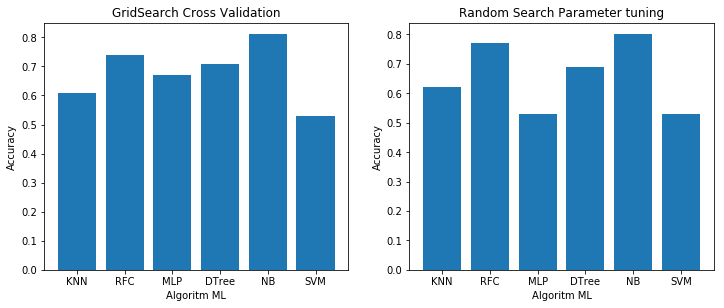

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
python_course_green = "#476042"
plt.figure(figsize=(12, 10))
plt.subplot(221) # equivalent to: plt.subplot(2, 2, 1)

Test=[0.61,0.74,0.67,0.71,0.81,0.53]
labels=['KNN','RFC','MLP','DTree','NB','SVM']
xs=[i for i,_ in enumerate(labels)]
plt.bar(xs,Test)
plt.xticks(xs,labels)
plt.title('GridSearch Cross Validation')
plt.xlabel('Algoritm ML')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



plt.subplot(222)


Train=[0.62,0.77,0.53,0.69,0.80,0.53]
labels=['KNN','RFC','MLP','DTree','NB','SVM']
xs=[i for i,_ in enumerate(labels)]
plt.bar(xs,Train)
plt.xticks(xs,labels)
plt.title('Random Search Parameter tuning')
plt.xlabel('Algoritm ML')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



plt.plot()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


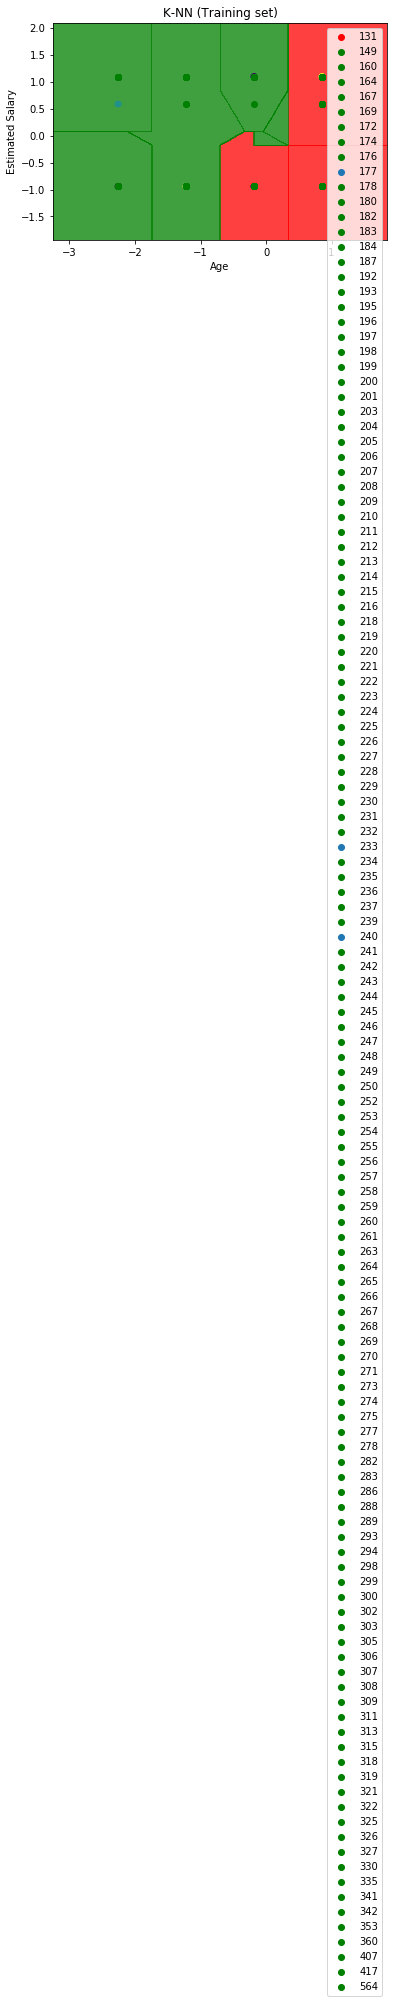

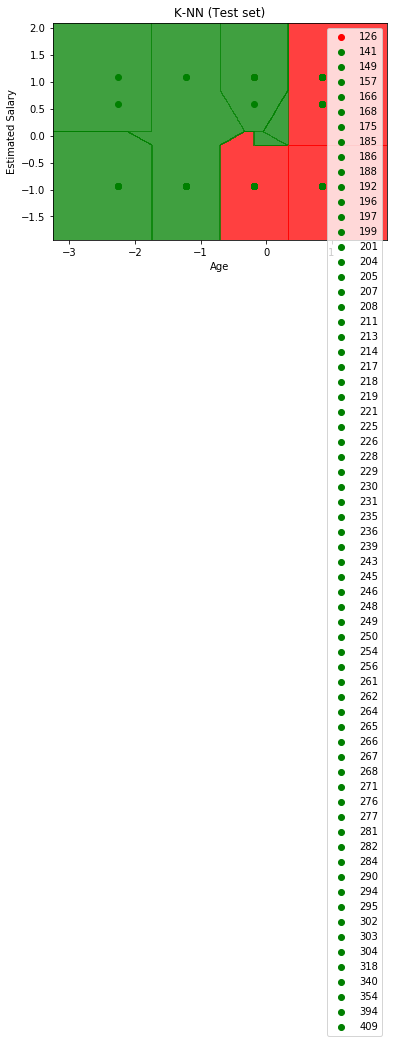

In [36]:
# K-Nearest Neighbors (K-NN)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('Health.xlsx')
X = dataset.iloc[:, [2, 12]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [37]:
#اتمام الگوریتم شبیه سازی 
#شروع انتخاب ویژگی

In [38]:
##We have designed the Relief algorithms to be integrated directly into scikit-learn 
    #machine learning workflows. For example, the ReliefF algorithm can be 
    #used as a feature selection step in a scikit-learn pipeline as follows.

import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

genetic_data = pd.read_excel('Health.xlsx')

features, labels = genetic_data.drop('ehtemal voghu bimari ghalbi', axis=1).values, genetic_data['ehtemal voghu bimari ghalbi'].values

clf = make_pipeline(ReliefF(n_features_to_select=2, n_neighbors=100),
                    RandomForestClassifier(n_estimators=100))

print(np.mean(cross_val_score(clf, features, labels)))

0.7507565450422593
